In [1]:
import numpy as np 
import pandas as pd 

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

In [2]:
# creating Timestamp
pd.Timestamp('2023/02/21') 
type(pd.Timestamp('2023/02/21') ) 

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
pd.Timestamp('2022-06-01')
pd.Timestamp('2022,06,01')

Timestamp('2022-01-01 00:00:00')

In [4]:
# only year
pd.Timestamp('2018') 

Timestamp('2018-01-01 00:00:00')

In [5]:
# using text 
pd.Timestamp("25 jan 2018 ") 

Timestamp('2018-01-25 00:00:00')

In [6]:
# providing time also 
pd.Timestamp("21 feb 2023 6:45PM ") 

Timestamp('2023-02-21 18:45:00')

In [7]:
# create from python datetime.datetime()
import datetime as dt 
x = dt.datetime(2012,3,4,3,4,1) 
t = pd.Timestamp(x) 
t 

Timestamp('2012-03-04 03:04:01')

In [8]:
print(t.day) 
print(t.month)
print(t.year)
print(t.hour)
print(t.minute)
print(t.second)

4
3
2012
3
4
1


In [9]:
print(t.day_name()) 
print(t.month_name())
print(t.year)

Sunday
March
2012


In [10]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise (or python) datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [11]:
new_date = np.array("2013-04-21", dtype='datetime64')
new_date 

array('2013-04-21', dtype='datetime64[D]')

In [12]:
new_date + np.arange(12) 

array(['2013-04-21', '2013-04-22', '2013-04-23', '2013-04-24',
       '2013-04-25', '2013-04-26', '2013-04-27', '2013-04-28',
       '2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [13]:
# from strings
pd.DatetimeIndex(['2020/1/1','2021/1/1','2022/1/1'])

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.DatetimeIndex(['2020/1/1','2021/1/1','2022/1/1'])[0] 

Timestamp('2020-01-01 00:00:00')

In [15]:
# from python datetime 
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)]) 

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [16]:
# using Timestamp 
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [17]:
# use DatetimeIndex as series index 
pd.Series([3,5,6],index=dt_index) 

2023-01-01    3
2022-01-01    5
2021-01-01    6
dtype: int64

In [18]:
pd.Series([3,5,6],index=dt_index).reset_index() 

,index,0
0,2023-01-01,3
1,2022-01-01,5
2,2021-01-01,6


## date_range function 

In [19]:
pd.date_range(start = '2023-2-21', end='2023-3-21')

DatetimeIndex(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20',
               '2023-03-21'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# generate alternative dates - 2D, 3D etc
pd.date_range(start = '2023-2-21', end='2023-3-21', freq='2D')

DatetimeIndex(['2023-02-21', '2023-02-23', '2023-02-25', '2023-02-27',
               '2023-03-01', '2023-03-03', '2023-03-05', '2023-03-07',
               '2023-03-09', '2023-03-11', '2023-03-13', '2023-03-15',
               '2023-03-17', '2023-03-19', '2023-03-21'],
              dtype='datetime64[ns]', freq='2D')

In [21]:
# only Business days or working days
pd.date_range(start='2023/2/21', end='2023-3-21', freq='B') 

DatetimeIndex(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
               '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20',
               '2023-03-21'],
              dtype='datetime64[ns]', freq='B')

In [22]:
# one day from the week -by default 'W-SUN'
pd.date_range(start='2023/2/21', end='2023-3-21', freq='W') 

DatetimeIndex(['2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19'], dtype='datetime64[ns]', freq='W-SUN')

In [23]:
# only fridays from the week
pd.date_range(start='2023/2/21', end='2023-3-21', freq='W-fri') 

DatetimeIndex(['2023-02-24', '2023-03-03', '2023-03-10', '2023-03-17'], dtype='datetime64[ns]', freq='W-FRI')

In [24]:
# for every hour
pd.date_range(start='2023/2/21', end='2023-3-21', freq='h') 

DatetimeIndex(['2023-02-21 00:00:00', '2023-02-21 01:00:00',
               '2023-02-21 02:00:00', '2023-02-21 03:00:00',
               '2023-02-21 04:00:00', '2023-02-21 05:00:00',
               '2023-02-21 06:00:00', '2023-02-21 07:00:00',
               '2023-02-21 08:00:00', '2023-02-21 09:00:00',
               ...
               '2023-03-20 15:00:00', '2023-03-20 16:00:00',
               '2023-03-20 17:00:00', '2023-03-20 18:00:00',
               '2023-03-20 19:00:00', '2023-03-20 20:00:00',
               '2023-03-20 21:00:00', '2023-03-20 22:00:00',
               '2023-03-20 23:00:00', '2023-03-21 00:00:00'],
              dtype='datetime64[ns]', length=673, freq='H')

In [25]:
# for every 6 hour
pd.date_range(start='2023/2/21', end='2023-3-21', freq='6h') 

DatetimeIndex(['2023-02-21 00:00:00', '2023-02-21 06:00:00',
               '2023-02-21 12:00:00', '2023-02-21 18:00:00',
               '2023-02-22 00:00:00', '2023-02-22 06:00:00',
               '2023-02-22 12:00:00', '2023-02-22 18:00:00',
               '2023-02-23 00:00:00', '2023-02-23 06:00:00',
               ...
               '2023-03-18 18:00:00', '2023-03-19 00:00:00',
               '2023-03-19 06:00:00', '2023-03-19 12:00:00',
               '2023-03-19 18:00:00', '2023-03-20 00:00:00',
               '2023-03-20 06:00:00', '2023-03-20 12:00:00',
               '2023-03-20 18:00:00', '2023-03-21 00:00:00'],
              dtype='datetime64[ns]', length=113, freq='6H')

In [26]:
# for every month - END - All last days of the month
pd.date_range(start='2023/2/21', end='2023-3-21', freq='m') 

DatetimeIndex(['2023-02-28'], dtype='datetime64[ns]', freq='M')

In [27]:
# for every starting month - MS - All first days of the month
pd.date_range(start='2023/2/21', end='2023-3-21', freq='MS') 

DatetimeIndex(['2023-03-01'], dtype='datetime64[ns]', freq='MS')

In [28]:
# last days of the years
pd.date_range(start='2023/2/21', end='2026-3-21', freq='A') 

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [29]:
# using periods(number of results)
pd.date_range(start='2023/2/21', periods=25) 

DatetimeIndex(['2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17'],
              dtype='datetime64[ns]', freq='D')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [30]:
x = pd.Series(['2020/2/2','2022/8/5','2026/7/9'])
x.str.split(',').str.get(0)

0    2020/2/2
1    2022/8/5
2    2026/7/9
dtype: object

In [31]:
x 

0    2020/2/2
1    2022/8/5
2    2026/7/9
dtype: object

In [32]:
pd.to_datetime(x).dt.month  
pd.to_datetime(x).dt.day
pd.to_datetime(x).dt.month_name()  
pd.to_datetime(x).dt.year 

0    2020
1    2022
2    2026
dtype: int64

In [33]:
# with errors
y = pd.Series(['2020/2/2','2022/8/5','2026,7,9','2020/992/2','2029/12/18'])
pd.to_datetime(y,errors='coerce')

0   2020-02-02
1   2022-08-05
2          NaT
3          NaT
4   2029-12-18
dtype: datetime64[ns]

In [34]:
exp = pd.read_csv('/kaggle/input/daily-expenses/Daily Expenses.csv')
exp 

,Date,Time,Remark,Category,Mode,Cash In,Cash Out,Balance
0,01 Mar 2022,12:00 AM,Budget,Money,Online,5000.0,NaN,5000
1,02 Mar 2022,06:00 PM,Cashback,Bonus,Google Pay,5.0,NaN,5005
2,04 Mar 2022,08:00 PM,Cashback,Bonus,Paytm,100.0,NaN,5105
3,19 Mar 2022,08:00 AM,Bhel,Food,Cash,NaN,50.0,5055
4,19 Mar 2022,09:15 AM,"Sinnar to Shivaji Nagar, Pune",Travel,Cash,NaN,260.0,4795
...,...,...,...,...,...,...,...,...
559,25 Sep 2022,08:30 PM,Masala Cut Dosa,Food,Google Pay,NaN,45.0,340
560,26 Sep 2022,09:30 AM,Tea ☕,Drink,Amazon Pay,NaN,10.0,330
561,26 Sep 2022,05:00 PM,Tea ☕,Drink,Google Pay,NaN,10.0,320
562,27 Sep 2022,10:00 AM,Breakfast,Food,Google Pay,NaN,25.0,295


In [35]:
exp['full_date']= exp['Date']+" "+exp['Time'] 
exp 

,Date,Time,Remark,Category,Mode,Cash In,Cash Out,Balance,full_date
0,01 Mar 2022,12:00 AM,Budget,Money,Online,5000.0,NaN,5000,01 Mar 2022 12:00 AM
1,02 Mar 2022,06:00 PM,Cashback,Bonus,Google Pay,5.0,NaN,5005,02 Mar 2022 06:00 PM
2,04 Mar 2022,08:00 PM,Cashback,Bonus,Paytm,100.0,NaN,5105,04 Mar 2022 08:00 PM
3,19 Mar 2022,08:00 AM,Bhel,Food,Cash,NaN,50.0,5055,19 Mar 2022 08:00 AM
4,19 Mar 2022,09:15 AM,"Sinnar to Shivaji Nagar, Pune",Travel,Cash,NaN,260.0,4795,19 Mar 2022 09:15 AM
...,...,...,...,...,...,...,...,...,...
559,25 Sep 2022,08:30 PM,Masala Cut Dosa,Food,Google Pay,NaN,45.0,340,25 Sep 2022 08:30 PM
560,26 Sep 2022,09:30 AM,Tea ☕,Drink,Amazon Pay,NaN,10.0,330,26 Sep 2022 09:30 AM
561,26 Sep 2022,05:00 PM,Tea ☕,Drink,Google Pay,NaN,10.0,320,26 Sep 2022 05:00 PM
562,27 Sep 2022,10:00 AM,Breakfast,Food,Google Pay,NaN,25.0,295,27 Sep 2022 10:00 AM


In [36]:
exp['full_date'] = pd.to_datetime(exp['full_date']) 
exp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       564 non-null    object        
 1   Time       564 non-null    object        
 2   Remark     564 non-null    object        
 3   Category   564 non-null    object        
 4   Mode       564 non-null    object        
 5   Cash In    50 non-null     float64       
 6   Cash Out   514 non-null    float64       
 7   Balance    564 non-null    int64         
 8   full_date  564 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 39.8+ KB


In [37]:
exp['full_date'].dt.month_name() 

0          March
1          March
2          March
3          March
4          March
         ...    
559    September
560    September
561    September
562    September
563    September
Name: full_date, Length: 564, dtype: object

In [38]:
exp['full_date'].dt.hour 

0       0
1      18
2      20
3       8
4       9
       ..
559    20
560     9
561    17
562    10
563    16
Name: full_date, Length: 564, dtype: int64

In [39]:
exp['full_date'].dt.year 

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
559    2022
560    2022
561    2022
562    2022
563    2022
Name: full_date, Length: 564, dtype: int64

In [40]:
exp['full_date'].dt.is_month_start

0       True
1      False
2      False
3      False
4      False
       ...  
559    False
560    False
561    False
562    False
563    False
Name: full_date, Length: 564, dtype: bool

In [41]:
exp['full_date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
559    False
560    False
561    False
562    False
563    False
Name: full_date, Length: 564, dtype: bool

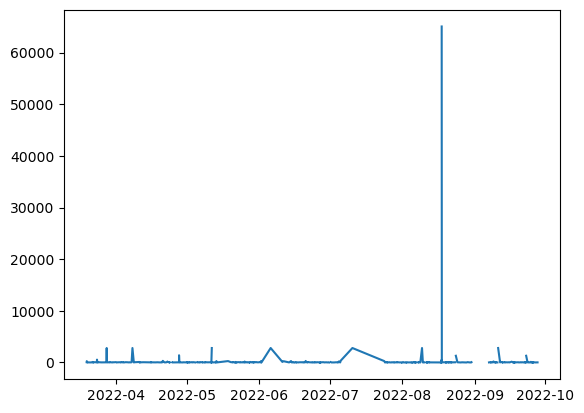

In [42]:
import matplotlib.pyplot as plt 
plt.plot(exp['full_date'],exp['Cash Out'])

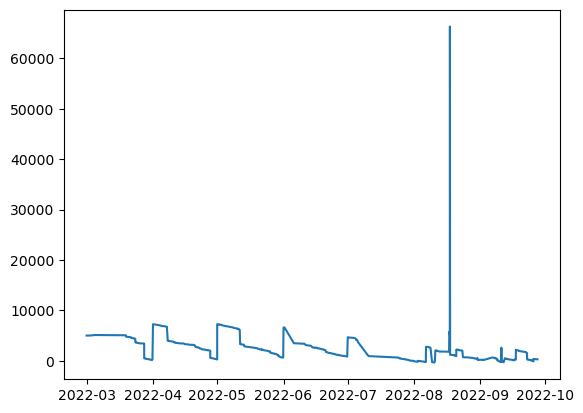

In [43]:
plt.plot(exp['full_date'],exp['Balance'])

<BarContainer object of 564 artists>

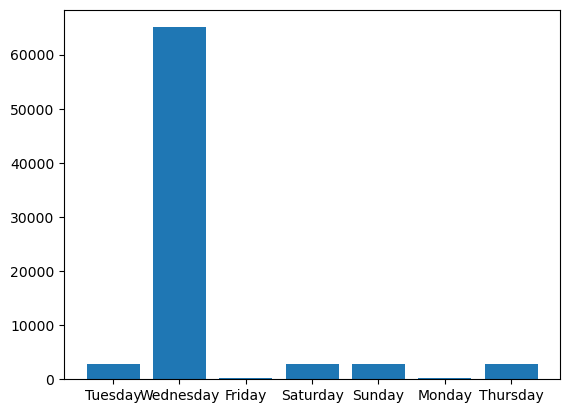

In [44]:
plt.bar(exp['full_date'].dt.day_name(),exp['Cash Out'])

<AxesSubplot:xlabel='full_date'>

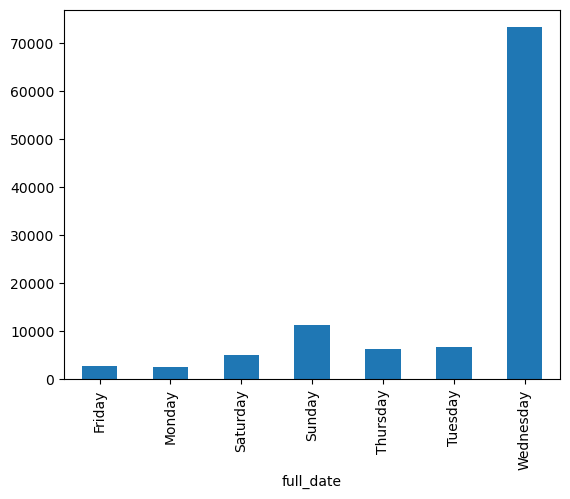

In [45]:
exp.groupby(exp['full_date'].dt.day_name())['Cash Out'].sum().plot(kind='bar')  

In [46]:
exp['month']=exp['full_date'].dt.month_name() 
exp.groupby('month')['Cash Out'].sum()  

month
April         7005.0
August       71924.0
July          4771.0
June          5788.0
March         4985.0
May           6798.0
September     6757.0
Name: Cash Out, dtype: float64

<AxesSubplot:xlabel='month'>

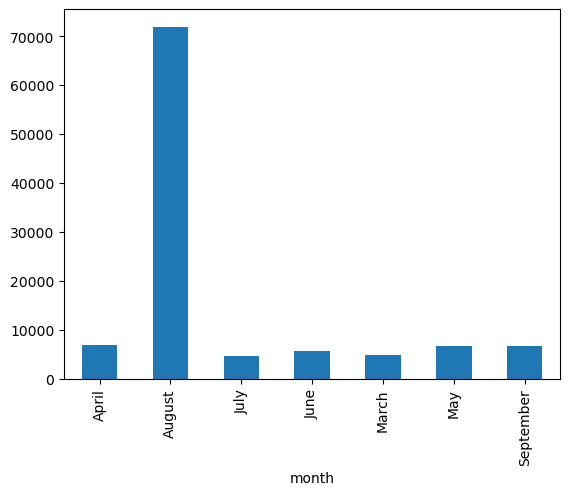

In [47]:
exp.groupby('month')['Cash Out'].sum().plot(kind='bar') 